In [1]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.2 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: gast
    Found existing installation: g

In [2]:
!pip install gdown

In [11]:
!gdown 1KD83bXFVoz26eVKBJPkjGkDYhdD4l67M
!unzip /content/collected_data_finale.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Downloading...
From (original): https://drive.google.com/uc?id=1KD83bXFVoz26eVKBJPkjGkDYhdD4l67M
From (redirected): https://drive.google.com/uc?id=1KD83bXFVoz26eVKBJPkjGkDYhdD4l67M&confirm=t&uuid=69097a33-43da-4ddc-8c32-b786059df8e8
To: /kaggle/working/Copia di collected_data_finale.zip
100%|█████████████████████████████████████████| 697M/697M [00:04<00:00, 169MB/s]
unzip:  cannot find or open /content/collected_data_finale.zip, /content/collected_data_finale.zip.zip or /content/collected_data_finale.zip.ZIP.


In [13]:
import os

old_name = r"/kaggle/working/Copia di collected_data_finale.zip"
new_name = r"/kaggle/working/collected_data_finale.zip"
os.rename(old_name, new_name)

In [14]:
!unzip /kaggle/working/collected_data_finale.zip

Archive:  /kaggle/working/collected_data_finale.zip
   creating: collected_data/auto_1/
  inflating: collected_data/auto_1/0.png  
  inflating: collected_data/auto_1/1.png  
  inflating: collected_data/auto_1/10.png  
  inflating: collected_data/auto_1/11.png  
  inflating: collected_data/auto_1/12.png  
  inflating: collected_data/auto_1/13.png  
  inflating: collected_data/auto_1/14.png  
  inflating: collected_data/auto_1/15.png  
 extracting: collected_data/auto_1/16.png  
  inflating: collected_data/auto_1/17.png  
  inflating: collected_data/auto_1/18.png  
  inflating: collected_data/auto_1/19.png  
 extracting: collected_data/auto_1/2.png  
  inflating: collected_data/auto_1/20.png  
  inflating: collected_data/auto_1/21.png  
  inflating: collected_data/auto_1/3.png  
  inflating: collected_data/auto_1/4.png  
  inflating: collected_data/auto_1/5.png  
  inflating: collected_data/auto_1/6.png  
 extracting: collected_data/auto_1/7.png  
  inflating: collected_data/auto_1/8.png

In [15]:
import numpy as np
import os
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [16]:
import os
import numpy as np

# Set the directory path where the text files are located
dir_path = "/kaggle/working/collected_data"

# Set the dimensions of each frame (height, width, number of color channels)
height, width, channels = 80, 112, 3

# Initialize lists to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0

# Traverse the directory tree rooted at dir_path
for root, dirs, files in os.walk(dir_path):

    # Loop through each file in the current directory
    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("/")[-1]  # Get the last part of the directory path
            label = label.split("_")[0]  # Extract the label before the first underscore

            # Increment counter to track progress
            counter += 1
            print(counter, end=" ")

            # Open and read the content of the text file
            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)

            # Convert the list to a NumPy array
            data_array = np.array(data_list)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))

            # Append the frames and label to the videos and labels lists
            videos.append(frames)
            labels.append(label)

# Print all the collected labels
print(labels)

# Convert the videos and labels lists to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [17]:
# Load the saved NumPy arrays for videos and labels
videos = np.load('/kaggle/working/videosCorrect.npy')
labels = np.load('/kaggle/working/labelsCorrect.npy')

# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)  # Outputs the shape of the videos array
print("Labels shape:", labels.shape)  # Outputs the shape of the labels array


Videos shape: (659, 22, 80, 112, 3)
Labels shape: (659,)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# Fit the label encoder with the labels
encoder.fit(labels)

# Transform the labels to encoded values
encoded_labels = encoder.transform(labels)

# Replace the original labels with the encoded labels
labels = encoded_labels


In [19]:
# Create a dictionary to map encoded labels to their corresponding string labels
label_dict = {
    0: 'auto',   # 0 corresponds to 'auto'
    1: 'cane',   # 1 corresponds to 'cane'
    2: 'ciao',   # 2 corresponds to 'ciao'
    3: 'demo',   # 3 corresponds to 'demo'
    4: 'gatto',  # 4 corresponds to 'gatto'
    5: 'moto',   # 5 corresponds to 'moto'
    6: 'ok',     # 6 corresponds to 'ok'
    7: 'pasta',  # 7 corresponds to 'pasta'
    8: 'pizza',  # 8 corresponds to 'pizza'
    9: 'uova'    # 9 corresponds to 'uova'
}


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)  # Outputs the shape of the training data and labels
print("Test set shape:", X_test.shape, y_test.shape)        # Outputs the shape of the test data and labels

# Delete the videos array to free up memory
del videos


Training set shape: (527, 22, 80, 112, 3) (527,)
Test set shape: (132, 22, 80, 112, 3) (132,)


In [21]:
import gc

# Collect garbage to free up memory
gc.collect()

# Display memory information
!cat /proc/meminfo | grep Mem


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


MemTotal:       32880800 kB
MemFree:         4444316 kB
MemAvailable:   25049192 kB


In [22]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)  # Left justify the class name for alignment
    print("{}  {} counts".format(class_name, count))  # Print the class name and its count


auto   66 counts
cane   66 counts
ciao   66 counts
demo   66 counts
gatto  66 counts
moto   66 counts
ok     66 counts
pasta  66 counts
pizza  65 counts
uova   66 counts


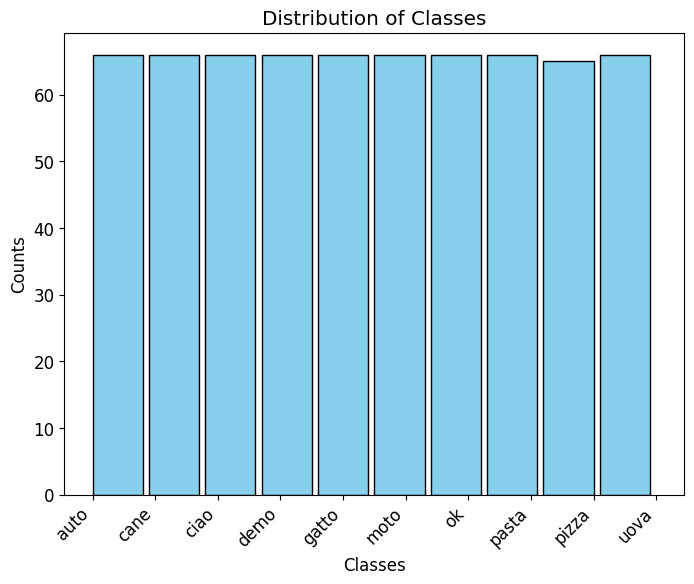

In [23]:
import matplotlib.pyplot as plt

# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size for the plot
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram of class distributions
plt.hist(labels, bins=len(classes), width=0.8, color='skyblue', edgecolor='black')

# Set x-ticks with class names, rotate them for better readability
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')

# Label the x-axis and y-axis
plt.xlabel('Classes')
plt.ylabel('Counts')

# Set the title of the plot
plt.title('Distribution of Classes')

# Display the plot
plt.show()


In [24]:
# Define the input shape for the model
input_shape = (22, 80, 112, 3)

# Initialize a sequential model
model = Sequential()

# Add a 3D convolutional layer with 8 filters, 3x3x3 kernel, ReLU activation, and L2 regularization
model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))

# Add a 3D max pooling layer with 2x2x2 pool size
model.add(MaxPooling3D((2, 2, 2)))

# Add a 3D convolutional layer with 32 filters, 3x3x3 kernel, ReLU activation, and L2 regularization
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add a 3D max pooling layer with 2x2x2 pool size
model.add(MaxPooling3D((2, 2, 2)))

# Add a 3D convolutional layer with 256 filters, 3x3x3 kernel, ReLU activation, and L2 regularization
model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Flatten the 3D output to 1D
model.add(Flatten())

# Add a dense (fully connected) layer with 1024 units, ReLU activation, and 50% dropout
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Add a dense layer with 256 units, ReLU activation, and 50% dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Add a dense layer with 64 units, ReLU activation, and 50% dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add the output dense layer with 10 units (number of classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding for training and test sets
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

# Print the model summary to see the architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 78, 110, 8)    656       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 39, 55, 8)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 37, 53, 32)     6944      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 18, 26, 32)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 16, 24, 256)    221440    
                                                                 
 flatten (Flatten)           (None, 196608)            0

In [25]:
# Train the model and record the history of training
history = model.fit(X_train, y_train_onehot, epochs=30, batch_size=16, validation_data=(X_test, y_test_onehot))

Epoch 1/30
33/33 [==============================] - 219s 7s/step - loss: 36.4381 - accuracy: 0.1252 - val_loss: 2.2846 - val_accuracy: 0.2727
Epoch 2/30
33/33 [==============================] - 220s 7s/step - loss: 2.2213 - accuracy: 0.2182 - val_loss: 2.0384 - val_accuracy: 0.3712
Epoch 3/30
33/33 [==============================] - 214s 6s/step - loss: 2.0048 - accuracy: 0.3112 - val_loss: 1.7697 - val_accuracy: 0.5985
Epoch 4/30
33/33 [==============================] - 214s 6s/step - loss: 1.6977 - accuracy: 0.4668 - val_loss: 1.4423 - val_accuracy: 0.6894
Epoch 5/30
33/33 [==============================] - 214s 6s/step - loss: 1.3959 - accuracy: 0.5636 - val_loss: 0.9658 - val_accuracy: 0.8485
Epoch 6/30
33/33 [==============================] - 215s 7s/step - loss: 1.0555 - accuracy: 0.6850 - val_loss: 0.7539 - val_accuracy: 0.8030
Epoch 7/30
33/33 [==============================] - 214s 6s/step - loss: 0.8129 - accuracy: 0.7457 - val_loss: 0.6751 - val_accuracy: 0.8561
Epoch 8/30
3

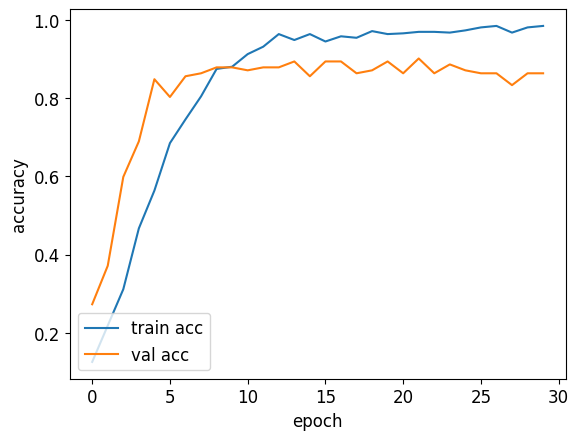

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'hist' is your history object containing loss and accuracy history

# Create a figure and axis objects for loss and accuracy
fig, acc_ax = plt.subplots()

# Plot training and validation accuracy on the secondary y-axis
acc_ax.plot(history.history['accuracy'], label='train acc')
acc_ax.plot(history.history['val_accuracy'], label='val acc')

# Set the labels for the x-axis and y-axes
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

# Add legends to the plot
acc_ax.legend(loc='lower left')  # Legend for accuracy

# Display the plot
plt.show()

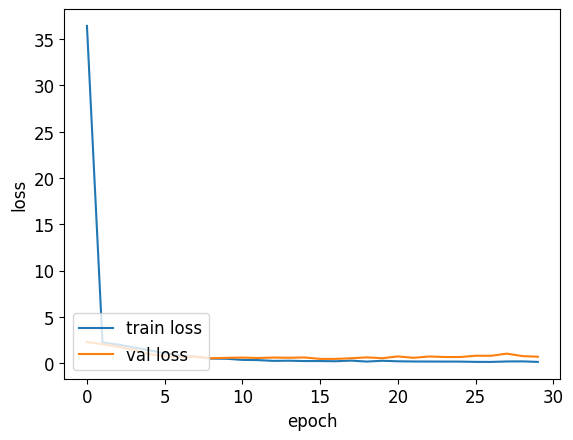

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'hist' is your history object containing loss and accuracy history

# Create a figure and axis objects for loss and accuracy
fig, loss_ax = plt.subplots()

# Plot training and validation loss on the primary y-axis
loss_ax.plot(history.history['loss'], label='train loss')
loss_ax.plot(history.history['val_loss'], label='val loss')

# Set the labels for the x-axis and y-axes
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

# Add legends to the plot
loss_ax.legend(loc='lower left')  # Legend for loss

# Display the plot
plt.show()

In [30]:
model.save_weights('model_weights4.h5')

In [31]:
model.load_weights('test.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'test.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [32]:
# Predict probabilities for each class using the trained model
y_pred_prob = model.predict(X_test)

# Extract the predicted class labels by selecting the index with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)


5/5 [==============================] - 7s 1s/step


In [33]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

# Generate classification report with output in dictionary format
report = classification_report(y_test, y_pred, output_dict=True)

# Initialize a PrettyTable to display the classification metrics
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

# Iterate through each class in the classification report
for label, metrics in report.items():
    # Check if the label is a digit (class label)
    if label.isdigit():
        # Round the metrics to two decimal places for display
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        
        # Map the numeric label to its corresponding class name using label_dict
        class_name = label_dict[int(label)]
        
        # Add a row to the PrettyTable with class name and metrics
        table.add_row([class_name, precision, recall, f1_score, support])

# Print the PrettyTable
print(table)


+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|  auto |    0.88   |  0.83  |   0.86   |    18   |
|  cane |    0.89   |  0.89  |   0.89   |    18   |
|  ciao |    0.8    |  0.89  |   0.84   |    9    |
|  demo |    0.83   |  0.88  |   0.86   |    17   |
| gatto |    1.0    |  1.0   |   1.0    |    7    |
|  moto |    0.81   |  0.81  |   0.81   |    16   |
|   ok  |    1.0    |  0.8   |   0.89   |    10   |
| pasta |    0.81   |  1.0   |   0.9    |    13   |
| pizza |    0.9    |  0.9   |   0.9    |    10   |
|  uova |    0.83   |  0.71  |   0.77   |    14   |
+-------+-----------+--------+----------+---------+


In [34]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 0.8720249766573295


5/5 [==============================] - 8s 1s/step


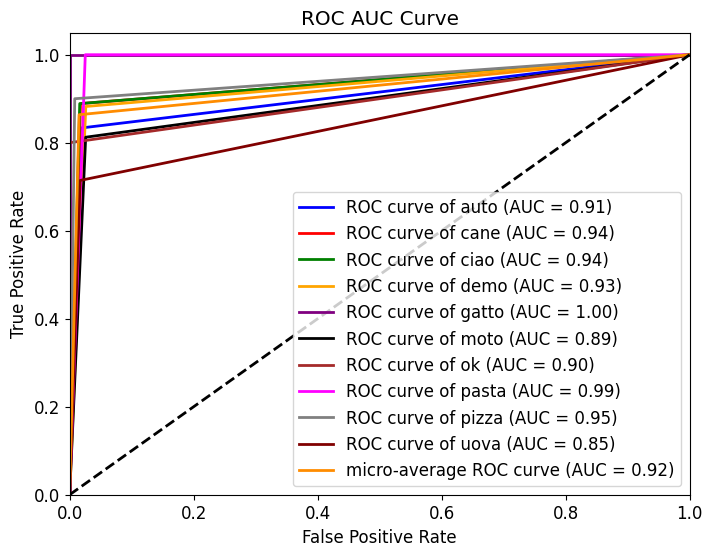

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_true and y_pred to one-hot encoding
n_classes = len(np.unique(y_test))

# Convert y_true to binary format (one-hot encoding)
y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Convert y_pred to binary format (one-hot encoding)
y_pred_bin = model.predict(X_test)
y_pred_bin = label_binarize(np.argmax(y_pred_bin, axis=1), classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(8,6))
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta', 'gray', 'maroon', 'navy', 'olive', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(label_dict[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=lw,
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_micro))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()


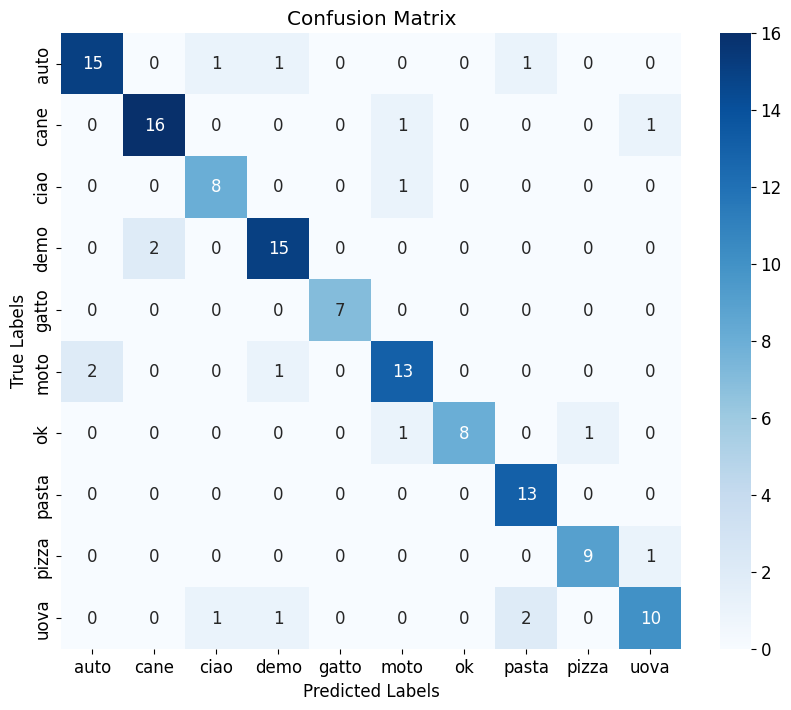

In [36]:
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap for the confusion matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()
